# A values implementation (weights control in STDP)

In [5]:
import math
import numpy as np

In [6]:
testing_values = np.arange(-200, 80)

## Classical Implementation

In [7]:
A = 1
B = - 1
tau_pre = 10.
tau_post = 20.

stdp_range = []
for x in testing_values:
    if x > 0:
        timedelta = - abs(x) / tau_pre
        deltaW = A * math.exp(timedelta)
    if x < 0:
        timedelta = - abs(x) / tau_post
        deltaW = B * math.exp(timedelta)
    stdp_range.append(deltaW)
    
stdp_range = np.asarray(stdp_range)

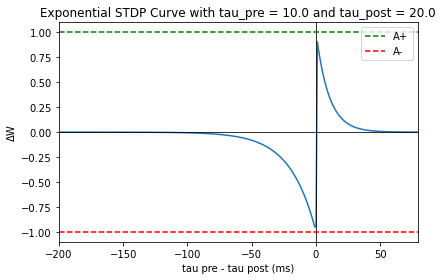

In [8]:
import matplotlib.pyplot as plt

plt.plot(testing_values, stdp_range)
plt.plot(testing_values, np.zeros(testing_values.shape), "k", linewidth=0.8)
plt.plot(0, "k")
plt.plot(np.zeros(testing_values.shape), testing_values, "k", linewidth=0.8)

plt.plot(testing_values, np.ones(testing_values.shape) * A, "g--", label="A+")
plt.plot(testing_values, np.ones(testing_values.shape) * B, "r--", label="A-")

plt.xlim(testing_values[0], testing_values[-1])
plt.ylim(B - 0.1 , A + 0.1)
plt.xlabel("tau pre - tau post (ms)")
plt.ylabel("ΔW")
plt.title(f"Exponential STDP Curve with tau_pre = {tau_pre} and tau_post = {tau_post}")
plt.legend()

plt.tight_layout()

plt.show()

## SpikingJelly Implementation

### Trace Pre & Trace Post

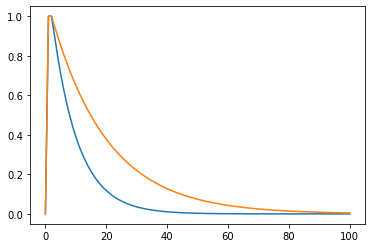

In [9]:
trace_pre = []
trace_post = []
trace = 0
trace_pre.append(trace)
trace_post.append(trace)

for t in range(100):
    if t == 0:
        trace = trace - trace/tau_pre + 1
    else:
        trace = trace - trace_pre[t-1]/tau_pre
    trace_pre.append(trace)

trace = 0
for t in range(100):
    if t == 0:
        trace = trace - trace/tau_post + 1
    else:
        trace = trace - trace_post[t-1]/tau_post
    trace_post.append(trace)
    
plt.plot(trace_pre)
plt.plot(trace_post)
plt.show()

(10000,)


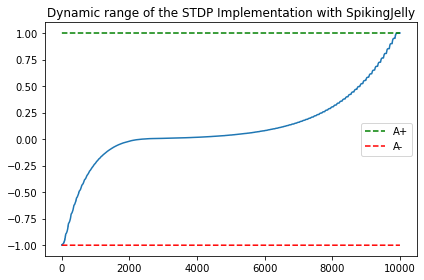

In [10]:
def f_post(x):
    return np.clip(x, 0, A)

def f_pre(x):
    return np.clip(x, 0, -B)

initial_weight = 1

stdp_range = []
for x in range(100):
    for y in range(100):
        delta_pre = f_pre(initial_weight) * trace_pre[x]
        delta_post = f_post(initial_weight) * trace_post[y]
        deltaW = delta_post - delta_pre
        stdp_range.append(deltaW)
    
stdp_range = np.asarray(stdp_range)
stdp_range.sort()
print(stdp_range.shape)

plt.plot(stdp_range)
plt.plot(np.arange(stdp_range.shape[0]), np.ones(stdp_range.shape) * A, "g--", label="A+")
plt.plot(np.arange(stdp_range.shape[0]), np.ones(stdp_range.shape) * B, "r--", label="A-")
plt.title("Dynamic range of the STDP Implementation with SpikingJelly")
plt.legend()
plt.tight_layout()
plt.show()